<a href="https://colab.research.google.com/github/MonseMoreno/ArteDeLaAnalitica/blob/main/09_2_actividad_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Estadística básica

* **Nombre:** Monserrat Karime Moreno Casas
* **Matrícula:** A01276775

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [2]:
# Carga las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()



from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [3]:
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

In [10]:
# Escribe el código necesario para realizar el análisis estadístico descrito 
# anteriormente.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [11]:
# Conclusiones 
#Realizando un análisis de los datos generados las primeras impresiones son que en promedio los libros tienen
#4.6 estrellas, existen bastantes libros con pocas reseñas 

In [4]:
# Correlación de variables (relevantes) 
selected = df.drop(columns=['Name', 'Author', 'Year'])

r, p = stats.pearsonr(selected['Price'], selected['User Rating'])
print(f"Correlación Pearson (Price - User Rating): r={r}, p-value={p}")

r, p = stats.pearsonr(selected['Price'], selected['Reviews'])
print(f"Correlación Pearson (Price - Reviews): r={r}, p-value={p}")

r, p = stats.pearsonr(selected['User Rating'], selected['Reviews'])
print(f"Correlación Pearson (User Rating - Reviews): r={r}, p-value={p}")

Correlación Pearson (Price - User Rating): r=-0.13308628728087996, p-value=0.0017601566810135627
Correlación Pearson (Price - Reviews): r=-0.10918188342780519, p-value=0.010395725279706223
Correlación Pearson (User Rating - Reviews): r=-0.001729014255549977, p-value=0.9677289828979609


**¿Cuáles son las variables relevantes e irrelevantes para el análisis?**


Personalmente puedo concluir que las variables con más relevancia para realizar un análisis son las de User Rating, Reviews y Price, simplemente porque se tratan de variables númericas que facilitan el análisis 

Las variables cualitativas serían menos relevantes, a excepción del nombre del libro, ya que sería la etiqueta principal p

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
> Las variables que considero irrelevantes son las que tienen un valor cualitativo a excepción del nombre del libro, no porque tenga relevancia en el cálculo, sino porque considero que es la etiqueta principal para saber de qué libro se está hablando
* ¿Existen variables que tengan datos extraños?
Sí, el rating
* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
> No, las variables utilizsadas no contienen datos similares, por ende nos vemos obligados a realizar una normalización qye evitará resultados o predicciones erróneas

* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?
> Lo grupos identificados son grupos de libros con un número bajo de reseñas y otro con un número alto de reseñas con diferentes calificaciones o ratings.

Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

Text(0.5, 1.05, 'Distribución por género literario')

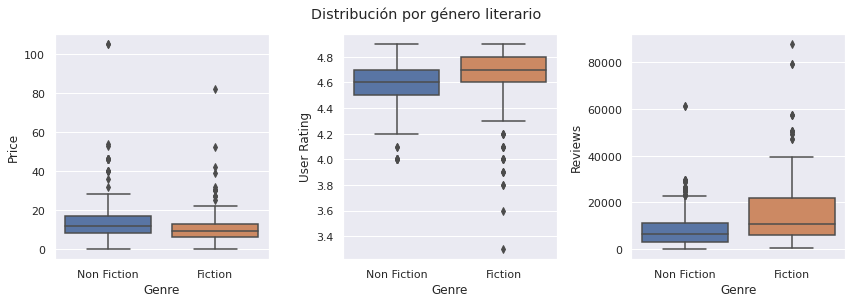

In [12]:
# Gráfico de caja y bigote.
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(data=df, y = 'Price', x='Genre', ax=axs[0])
sns.boxplot(data=df, y = 'User Rating', ax=axs[1], x='Genre')
sns.boxplot(data=df, y = 'Reviews', ax=axs[2], x='Genre')

plt.tight_layout()
plt.suptitle('Distribución por género literario', y=1.05)

En las grráficas anteriores se pueden identicar bastantes valores anormales que perjudican la precisión de sus cálculos

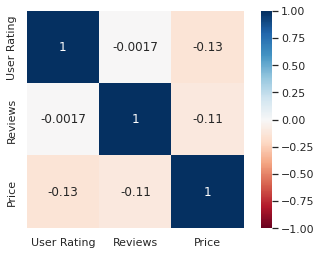

In [13]:
# Gráfico de mapa de calor.
sns.heatmap(data=selected.corr(), vmin=-1, vmax = 1, cmap='RdBu', annot=True, square=True)

Debido al bajo numero de coeficientes de correlación se puede concluir que la relación entre estos es bastante baja

Text(0.5, 1.05, 'Gráfico de dispersión de variables numéricas de los libros por género literario')

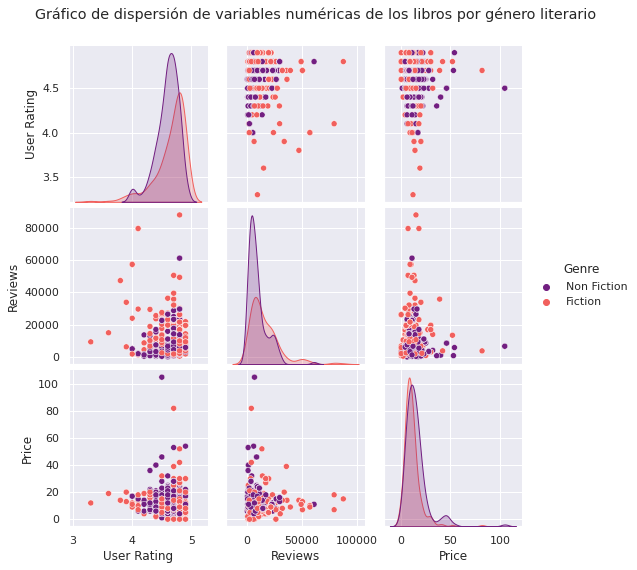

In [ ]:
# Gráfico de dispersión.
sns.pairplot(data=selected, palette='magma', hue='Genre')
plt.suptitle('Gráfico por género literario', y=1.05)

Estos graficos ayudan a identificaar y confirmaqr que existe una baja correlación entre las variables

## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.
* Determina un valor de $k$
* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas
- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
> Sí, ya que representan un estándar de las características qque comparten
- ¿Cómo obtuviste el valor de $k$ a usar?
> Con el método del codo, yaz que permite identificar el k más óptimo para nuestros datos
- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
> No, los centros son representativos en tanto que se tenga la menor suma de distancia de éste con los puntos del grupo
- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
> Existiría una agrupación incorrectaa y amorfa 
- ¿Qué puedes decir de los datos basándose en los centros?
> De los centros se pueden decir las caracteríticas base de cada grupo. 


In [16]:
# Normalización de variables.
numeric_cols = ['User Rating', 'Price',	'Reviews']
x = selected.loc[:, numeric_cols]

scaler = StandardScaler()
x_norm = scaler.fit_transform(x)

x_norm = pd.DataFrame(x_norm, columns=numeric_cols)
x_norm.head()

,User Rating,Price,Reviews
0,0.359990,-0.470810,0.460453
1,-0.080978,0.821609,-0.844786
2,0.359990,0.175400,0.599440
3,0.359990,-0.655441,0.808050
4,0.800958,-0.101547,-0.365880


Text(0.5, 1.0, 'Silhouette Score')

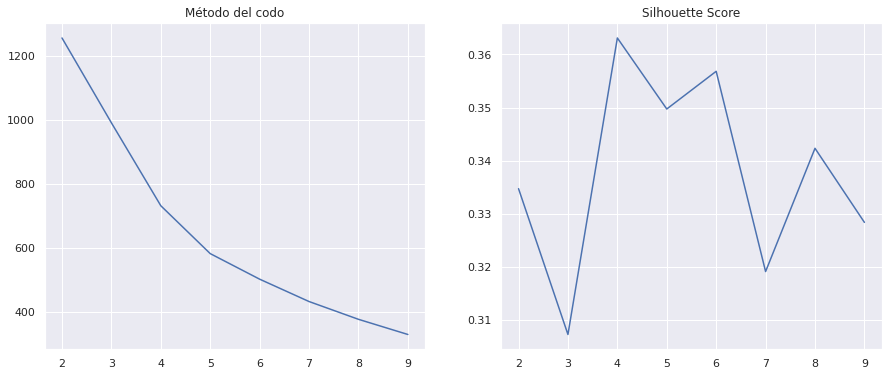

In [17]:
# Determinación de k.
wcss   = []
sil_score = []

for k in range(2,10):
  model = KMeans(n_clusters = k, random_state = 47)
  groups = model.fit_predict(x_norm)
  wcss.append(model.inertia_)
  sil_score.append(silhouette_score(x_norm, groups))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Codo
axs[0].plot(range(2,10), wcss)
axs[0].set_title('Método del codo')

# Silhouette Score
axs[1].plot(range(2,10), sil_score)
axs[1].set_title('Silhouette Score')

In [18]:
# Implementa el algoritmo de kmeans y justifica la elección del 
# número de clusters. Usa las variables numéricas.

model = KMeans(n_clusters=4, random_state=47)
clusters = model.fit_predict(x_norm)
selected['Group'] = clusters.astype('str')
selected.head()

,User Rating,Reviews,Price,Genre,Group
0,4.7,17350,8,Non Fiction,0
1,4.6,2052,22,Fiction,2
2,4.7,18979,15,Non Fiction,0
3,4.7,21424,6,Fiction,0
4,4.8,7665,12,Non Fiction,2


In [20]:
# Haz un análisis por grupo para determinar las características que los hace 
# únicos. Ten en cuenta todas las variables numéricas.

selected.groupby('Group').mean()

,User Rating,Reviews,Price
Group,,,
0,4.693846,27444.646154,9.084615
1,4.232143,8631.666667,12.416667
2,4.698065,6753.977419,11.900000
3,4.538462,7219.538462,49.692308


In [19]:
# Dispersiones de los grupos
selected.groupby('Group').std()

,User Rating,Reviews,Price
Group,,,
0,0.184161,12779.526505,3.833825
1,0.208933,9097.337152,5.013736
2,0.118770,4145.890023,6.819423
3,0.144435,6978.798305,18.750508


Text(0.5, 1.05, 'Grupos de libros')

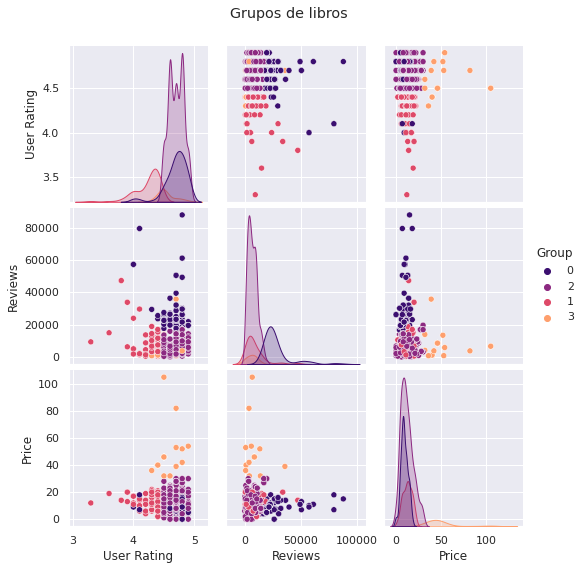

In [27]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D 
# (si es necesario). Analiza las características de cada grupo.


sns.pairplot(data=selected, hue='Group', palette='magma')
plt.suptitle('Grupos de libros', y=1.05)

In [ ]:
fig = px.scatter_3d(selected, x = 'Price', y = 'User Rating', 
                    z = 'Reviews', 
                    title='Grupos de libros',
                    color='Group',  
                    color_discrete_sequence=px.colors.qualitative.D3)

fig.show()

**Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?**

Observando las gráficas y las tablas anteriores, podemos generar las siguiente conclusiones sobre nuestros grupos:

* grupo 0 ('Amados') : calificación y un número de reseñas alto con precios bajos
* grupo 1 ('Medio populares): calificación y un número de reseñas bajo de precio medios.
* grupo 2 ('Poco conocidos'): calificación alta y un número de reseñas bajo de precio medio
* grupo 3 ('Alto precio, pero amados'): calificación alta y un número de reseñas bajo de precio alto.